In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the data from csv file to dataframe
loan_data = pd.read_csv("loan.csv", low_memory=False)
#Check for unnecessary header and footer rows to delete
loan_data.head()
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(loan_data.shape)
#Remove missing value columns if any
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 57)
(39717, 57)


<Axes: >

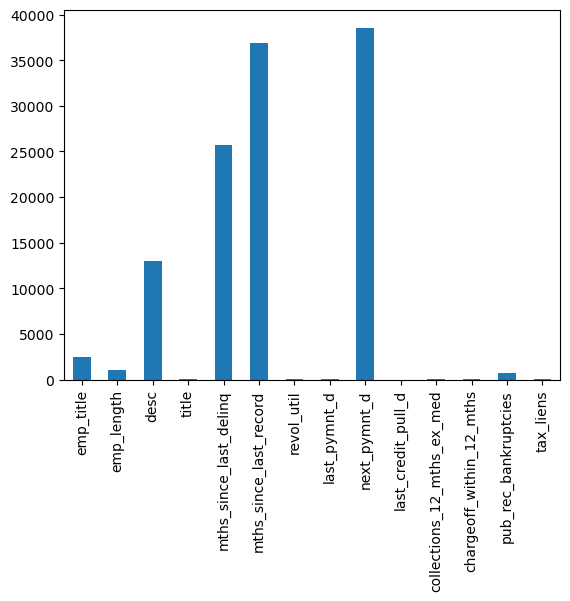

In [13]:
#plot to understand missing values in each column of the dataset
loan_data.isna().sum()[loan_data.isna().sum()>0].plot(kind='bar')

In [21]:
#From above plot we can see that some cloumns have missing values, drop columns where null values are more than 10000
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.isna().sum() > 10000)], axis=1, inplace=True)
print(loan_data.shape)
#Remove missing value rows from columns having null vlaues < 10000
loan_data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
loan_data.dropna(subset=['emp_title'], inplace=True)
loan_data.dropna(subset=['emp_length'], inplace=True)
print(loan_data.shape)

(39020, 44)
(36548, 44)


In [22]:
#Drop columns with only one value for all rows . We can't do any analysis on these columns.
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.nunique() == 1)], axis=1, inplace=True)
print(loan_data.shape)

(36548, 44)


In [16]:
#Let us understand the loan_data
print(loan_data.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           